In [9]:

import os
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from scipy.io import wavfile
from sklearn.metrics import silhouette_score


import librosa.display


In [12]:

from google.colab import drive
drive.mount('/content/drive')
metadata_path = '/content/drive/MyDrive/vocal_only_dataset_3000/metadata.csv'
df = pd.read_csv(metadata_path)


audio_dir = '/content/drive/MyDrive/vocal_only_dataset_3000/clips_30s'
audio_files = [os.path.join(audio_dir, f) for f in os.listdir(audio_dir) if f.endswith('.wav')]


df.head()


Mounted at /content/drive


,clip_path,language,genre,lyrics
0,clips_30s/english_indie_00000.wav,english,indie,english synthetic vocal-only clip 0. genre=ind...
1,clips_30s/bangla_pop_00001.wav,bangla,pop,bangla synthetic vocal-only clip 1. genre=pop....
2,clips_30s/english_pop_00002.wav,english,pop,english synthetic vocal-only clip 2. genre=pop...
3,clips_30s/bangla_indie_00003.wav,bangla,indie,bangla synthetic vocal-only clip 3. genre=indi...
4,clips_30s/english_rock_00004.wav,english,rock,english synthetic vocal-only clip 4. genre=roc...


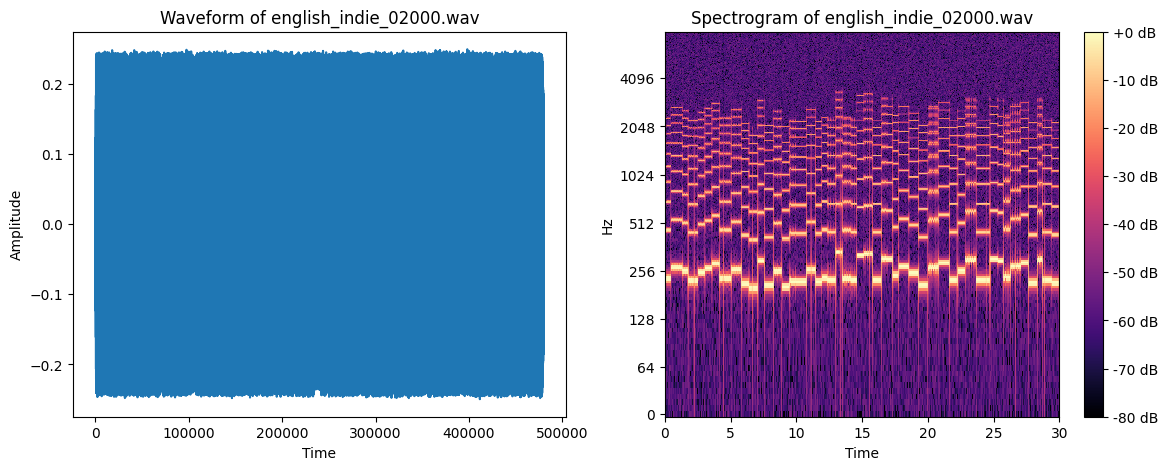

In [13]:


def plot_audio_sample(file_path):
    y, sr = librosa.load(file_path, sr=None)
    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.plot(y)
    plt.title("Waveform of " + os.path.basename(file_path))
    plt.xlabel('Time')
    plt.ylabel('Amplitude')

    plt.subplot(1, 2, 2)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    librosa.display.specshow(D, x_axis='time', y_axis='log', sr=sr)
    plt.title("Spectrogram of " + os.path.basename(file_path))
    plt.colorbar(format='%+2.0f dB')
    plt.show()


plot_audio_sample(audio_files[0])


In [ ]:


def extract_mfcc(file_path, n_mfcc=13):
    y, sr = librosa.load(file_path, sr=None)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    return np.mean(mfcc, axis=1)


mfcc_features = [extract_mfcc(file) for file in audio_files]


mfcc_df = pd.DataFrame(mfcc_features)
mfcc_df.head()


In [ ]:



latent_vectors = np.random.randn(len(audio_files), 16)


tsne = TSNE(n_components=2, random_state=42)
latent_2d = tsne.fit_transform(latent_vectors)


plt.figure(figsize=(10, 6))
plt.scatter(latent_2d[:, 0], latent_2d[:, 1], alpha=0.7)
plt.title("t-SNE of Latent Space")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()


In [ ]:


kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(latent_vectors)

plt.figure(figsize=(10, 6))
plt.scatter(latent_2d[:, 0], latent_2d[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.7)
plt.title("t-SNE with K-Means Clusters")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.colorbar()
plt.show()


silhouette_avg = silhouette_score(latent_vectors, kmeans_labels)
print(f"Silhouette Score: {silhouette_avg}")
